from https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/

In [1]:
import os
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np
import PIL
import PIL.Image


2023-11-05 19:39:29.092632: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
download_dir = Path('/s/bach/a/class/cs435/cs435a/CS435_Plant_Data')
train_data_path = download_dir/'train'
test_data_path = download_dir/'test'
print(test_data_path)

/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/test


In [4]:
datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values from [0, 255] to [0, 1]

In [5]:
train_generator = datagen.flow_from_directory(
    train_data_path,  # This is the target directory
    target_size=(150, 150),    # All images will be resized to 150x150
    batch_size=32,
    class_mode='categorical'   # 'binary' for binary classification, 'categorical' for multi-class
)

test_generator = datagen.flow_from_directory(
    test_data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'   # Make sure this matches the class_mode of the train generator
)


Found 70295 images belonging to 38 classes.
Found 0 images belonging to 0 classes.


In [6]:
images, labels = next(train_generator)

In [18]:
class_names = train_ds.class_names
print(class_names)

NameError: name 'train_ds' is not defined

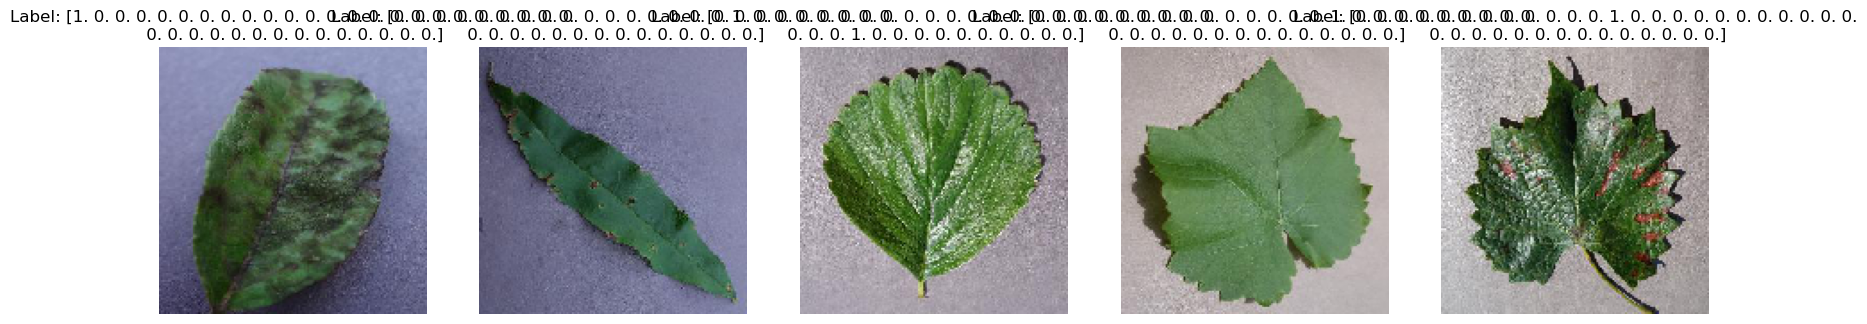

In [9]:
import matplotlib.pyplot as plt

images, labels = next(train_generator)

fig, axes = plt.subplots(1, 5, figsize=(20,20))

for i in range(0, 5):
    ax = axes[i]
    ax.imshow(images[i])
    ax.axis('off')  # Hide the axes ticks
    ax.set_title("Label: " + str(labels[i]))

plt.show()

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_data_path)


NameError: name 'tensorflow' is not defined

In [17]:

# https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=images[0].shape) #use Include_top=False to remove the classification layer that was trained on the ImageNet dataset
base_model.trainable = False ## Not trainable weights

In [14]:


## Preprocessing input
train_ds = preprocess_input(train_data_path) 
# test_ds = preprocess_input(test_ds)

2023-11-05 21:31:06.119622: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


58889256/58889256 [==============================] - 2s 0us/step


TypeError: 'PosixPath' object is not subscriptable